In [1]:
# Importar las bibliotecas necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Ejercicio 1: Implementación de SVM lineal en scikit-learn.
def ejercicio_1():
    # Cargar el conjunto de datos de iris
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear y entrenar el modelo SVM lineal
    svm_linear = SVC(kernel='linear')
    svm_linear.fit(X_train, y_train)
    
    # Calcular la precisión del modelo en el conjunto de prueba
    y_pred = svm_linear.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Precisión del SVM lineal:", accuracy)

# Ejercicio 2: Implementación de SVM no lineal con kernel polinomial.
def ejercicio_2():
    # Cargar el conjunto de datos de iris
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear y entrenar el modelo SVM con kernel polinomial
    svm_poly = SVC(kernel='poly', degree=3)
    svm_poly.fit(X_train, y_train)
    
    # Calcular la precisión del modelo en el conjunto de prueba
    y_pred = svm_poly.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Precisión del SVM con kernel polinomial:", accuracy)

# Ejercicio 3: Implementación de SVM no lineal con kernel radial (RBF).
def ejercicio_3():
    # Cargar el conjunto de datos de iris
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear y entrenar el modelo SVM con kernel radial (RBF)
    svm_rbf = SVC(kernel='rbf')
    svm_rbf.fit(X_train, y_train)
    
    # Calcular la precisión del modelo en el conjunto de prueba
    y_pred = svm_rbf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Precisión del SVM con kernel radial (RBF):", accuracy)

# Ejercicio 4: Evaluación y comparación de los diferentes modelos SVM.
def ejercicio_4():
    print("Evaluación y comparación de los diferentes modelos SVM:")
    ejercicio_1()  # SVM lineal
    ejercicio_2()  # SVM con kernel polinomial
    ejercicio_3()  # SVM con kernel radial (RBF)

# Ejercicio 5: Aplicación de SVM en un conjunto de datos real.
def ejercicio_5():
    # Cargar un conjunto de datos real (ejemplo: Breast Cancer Dataset)
    cancer = datasets.load_breast_cancer()
    X = cancer.data
    y = cancer.target
    
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear y entrenar el modelo SVM
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)
    
    # Calcular la precisión del modelo en el conjunto de prueba
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Precisión del modelo SVM en el conjunto de datos real:", accuracy)

# Llamar a cada ejercicio
ejercicio_1()
ejercicio_2()
ejercicio_3()
ejercicio_4()
ejercicio_5()


Precisión del SVM lineal: 1.0
Precisión del SVM con kernel polinomial: 1.0
Precisión del SVM con kernel radial (RBF): 1.0
Evaluación y comparación de los diferentes modelos SVM:
Precisión del SVM lineal: 1.0
Precisión del SVM con kernel polinomial: 1.0
Precisión del SVM con kernel radial (RBF): 1.0
Precisión del modelo SVM en el conjunto de datos real: 0.956140350877193


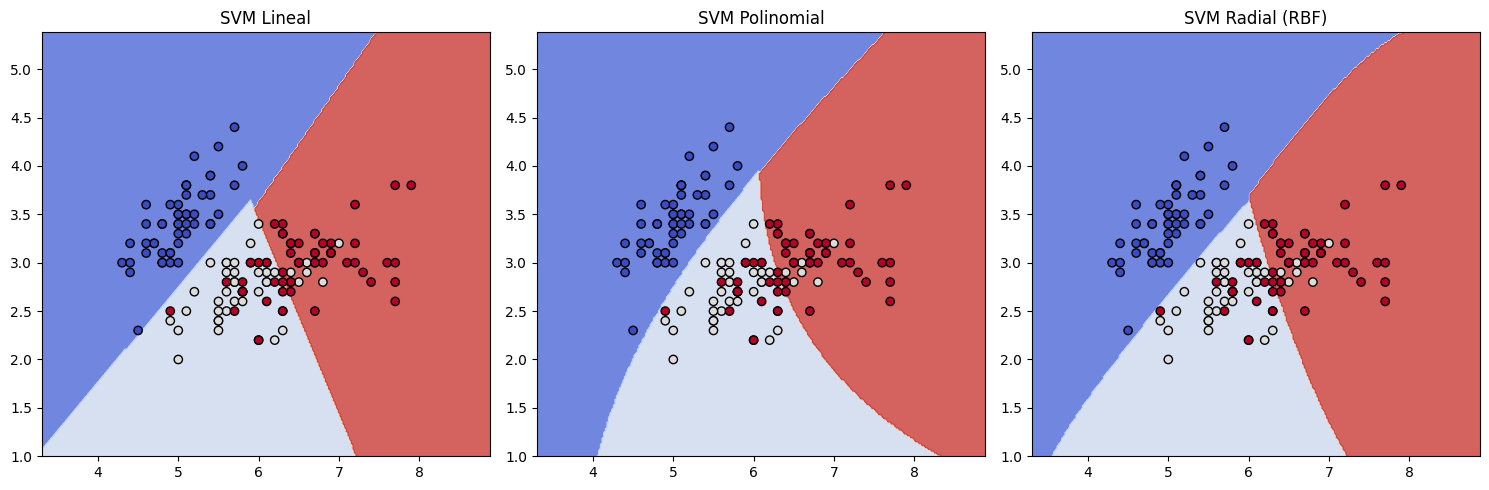

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Cargar el conjunto de datos de iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomar solo las dos primeras características para visualización
y = iris.target

# Crear una instancia de SVM para cada kernel
kernels = ['linear', 'poly', 'rbf']
svm_models = [SVC(kernel=k) for k in kernels]

# Entrenar los modelos SVM
for model in svm_models:
    model.fit(X, y)

# Crear una malla de puntos para graficar la superficie de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Graficar los resultados
fig, sub = plt.subplots(1, 3, figsize=(15, 5))
titles = ['SVM Lineal', 'SVM Polinomial', 'SVM Radial (RBF)']

for model, title, ax in zip(svm_models, titles, sub.flatten()):
    # Predecir la clase para cada punto en la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Graficar la superficie de decisión
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Graficar los puntos de datos
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)

plt.tight_layout()
plt.show()
